In [1]:
import numpy as np
from redmapper_halo_centered import RedMapperHaloCentered
from cluster_validation import *

%matplotlib inline

In [9]:
#Using catalogs in example code to verify consistent values, smaller truth catalog due to performance
redmapper_catalog_name='cosmoDC2_v1.1.4_redmapper_v0.7.5' 
dc2_catalog_name='cosmoDC2_v1.1.4'

redmapper_catalog_nm_old = 'cosmoDC2_v1.1.4_redmapper_v0.2.1py'
dc2_catalog_name_small = 'cosmoDC2_v1.0_9556'

rmhc = RedMapperHaloCentered(redmapper_catalog_name, dc2_catalog_name_small)

rmhc.cluster_only = False
rmhc.min_halo_mass = 1e14
rmhc.min_richness = 20

In [6]:
true_galaxy_data, true_halo_data = rmhc.get_true_data()
cluster_data = rmhc.get_cluster_data()
member_data = rmhc.get_member_data()

print("Number of elements in the truth catalog = ", len(true_galaxy_data))
print("Number of halos in the truth catalog = ", len(true_halo_data))
print("Number of clusters in the detection catalog = ", len(cluster_data))
print("Cluster catalog sky area = ", rmhc.redmapper_catalog.sky_area, "deg2")
print("Truth catalog sky area = ", rmhc.truth_catalog.sky_area, "deg2")

Number of elements in the truth catalog =  570
Number of halos in the truth catalog =  3
Number of clusters in the detection catalog =  1847
Cluster catalog sky area =  439.78987 deg2
Truth catalog sky area =  3.357174580844667 deg2


In [7]:
#check the cosmological parameters in the two catalogs
print('Cosmo in truth catalog:', rmhc.redmapper_catalog.cosmology)
print('Cosmo in detection catalog:', rmhc.truth_catalog.cosmology)
print('Halo mass definition in truth catalog:', rmhc.truth_catalog.halo_mass_def)

Cosmo in truth catalog: FlatLambdaCDM(H0=71 km / (Mpc s), Om0=0.265, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=0.0448)
Cosmo in detection catalog: FlatLambdaCDM(H0=71 km / (Mpc s), Om0=0.265, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=0.0448)
Halo mass definition in truth catalog: FoF, b=0.168


In [8]:
print('Catalog info in truth catalog:', rmhc.truth_catalog.get_catalog_info())
print('Catalog info in detection catalog:', rmhc.redmapper_catalog.get_catalog_info())

Catalog info in truth catalog: {'subclass_name': 'cosmodc2.CosmoDC2GalaxyCatalog', 'catalog_root_dir': '/global/cfs/cdirs/lsst/shared/xgal/cosmoDC2/cosmoDC2_v1.0.0_full_highres', 'catalog_filename_template': 'z_{}_{}.step_all.healpix_{}.hdf5', 'cosmology': {'H0': 71.0, 'Om0': 0.2648, 'Ob0': 0.0448, 'sigma8': 0.8, 'n_s': 0.963}, 'lightcone': True, 'version': '1.0.0', 'healpix_pixels': [9556], 'check_md5': False, 'check_size': False, 'check_cosmology': False, 'creators': ['Andrew Hearin', 'Danila Korytov', 'Eve Kovacs', 'Esteban Rangel', 'Patricia Larsen', 'Joe Hollowed', 'Andrew Benson', 'Katrin Heitmann'], 'description': 'This is small sub-volume (3.4 sq. deg.) of the extra-galactic catalog for the LSST-DESC data challenge DC2.\n'}
Catalog info in detection catalog: {'subclass_name': 'redmapper.RedmapperCatalog', 'catalog_root_dir': '/global/cfs/cdirs/lsst/shared/xgal/cosmoDC2/addons/redmapper_v1.1.4', 'catalog_path_template': {'clusters': 'cosmoDC2_v1.1.4_mag_run_redmapper_v0.7.5_lgt2

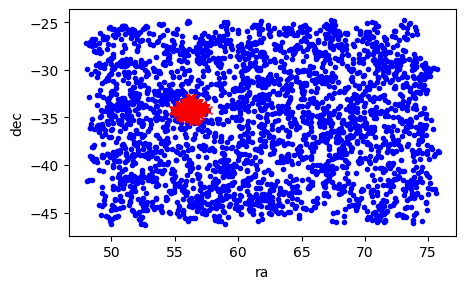

In [10]:
rmhc.plot_basic_cluster_halo_position()

Number of bijective associations 16
Number and fraction of fragmentation (0, 0.0)
Number and fraction of overmerging (1, 0.0625)
Completeness 0.2191780821917808
Purity 0.7496423460543502


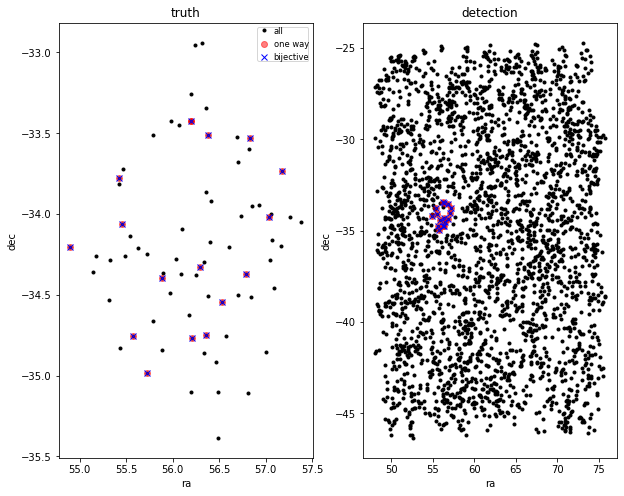

In [11]:
rmhc.associate_cluster_to_halo(delta_zmax=np.inf, theta_max=1., 
                               theta_max_type="fixed_angle", method="nearest")

In [ ]:
rmhc.associate_cluster_to_halo(delta_zmax=0.05, theta_max=1., 
                               theta_max_type="fixed_dist", method="nearest")

In [ ]:
rmhc.associate_cluster_to_halo(delta_zmax=0.05, theta_max=1., 
                               theta_max_type="scaled", method="nearest")

In [ ]:
rmhc.associate_cluster_to_halo(delta_zmax=0.05, theta_max=1., 
                               theta_max_type="fixed_dist", method="membership")